<a href="https://colab.research.google.com/github/alexganea7/Mini-projects-for-university-AI-class/blob/main/Mini_proiect_ML_Ganea_Alexandru_Gabriel%3B_Grupa_311.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Importuri**

In [ ]:
import numpy as np
import nltk
import re
import string
import itertools
import matplotlib.pyplot as plt
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn import svm
from sklearn.preprocessing import normalize
from sklearn.metrics import accuracy_score
from sklearn.utils import shuffle
from nltk.corpus import stopwords
from collections import Counter
nltk.download('gutenberg')
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package gutenberg to /root/nltk_data...
[nltk_data]   Package gutenberg is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

# **Extragerea datelor**

In [ ]:
sentences = []
authors = []  # toti autorii posibili
labels = []  # eticheta numerica pentru fiecare propozitie din dataset

In [ ]:
for textid in nltk.corpus.gutenberg.fileids():
  sentences_in_text = nltk.corpus.gutenberg.sents(textid)
  sentences.extend(sentences_in_text)
  author = textid.split("-")[0]
  if author not in authors:
    authors.append(author)
  authorid = authors.index(author)
  labels.extend([authorid for s in sentences_in_text])
sentences, labels = shuffle(sentences, labels, random_state=557)

# **Preprocesarea datelor**

In [ ]:
def preprocess_nltk(text, stopwords_list=None):
  if(type(text)!=str):
    text = " ".join(text)   # aveam datele sub forma de lista de liste de cuvinte si l-am facut propozitii ca sa mearga algoritmul de mai jos nemodificat
  text = text.lower()
  tokenized_text = nltk.word_tokenize(text) # splitting into words (+ separating punctuation from words)
  tokenized_text = [t for t in tokenized_text if t not in string.punctuation] # removing punctuation tokens
  tokenized_text = [t for t in tokenized_text if not stopwords_list or t not in stopwords_list]
  return tokenized_text

stopwords_list = stopwords.words('english')
stopwords_list.append('``')
stopwords_list.append("''")
stopwords_list.append("“")
stopwords_list.append("”")
stopwords_list.append("”")
stopwords_list.append("’")
stopwords_list.append("'")
data = []
for t in sentences:
    data.append(preprocess_nltk(t,stopwords_list))

# **Impartirea datelor**

In [ ]:
#impartirea datelor
print(len(data))
nr_test = int(20/100 * len(data))
nr_ramase = len(data) - nr_test
nr_valid = int(15/100 * nr_ramase)
nr_train = nr_ramase - nr_valid

train_data = data[:nr_train]
train_labels = labels[:nr_train]

valid_data = data[nr_train : nr_train + nr_valid]
valid_labels = labels[nr_train : nr_train + nr_valid]

test_data = data[nr_train + nr_valid: ]
test_labels = labels[nr_train + nr_valid:]


98552


# **Vectorizarea datelor**

In [ ]:
def words_to_sentences(data):  # am transformat vectorul de cuvinte in vector de propozitii pentru a folosi v.fit_transform()
  sentences = []
  for i in data:
    sentences.append(" ".join(i))
  return sentences

train_full = words_to_sentences(train_data)
test_full = words_to_sentences(test_data)
valid_full = words_to_sentences(valid_data)


In [ ]:
def vectorizer(max_features):
  v = CountVectorizer(max_features = max_features)
  return v

v = vectorizer(5000)
X_train = v.fit_transform(train_full)
X_test = v.transform(test_full)
X_train[1]

<1x5000 sparse matrix of type '<class 'numpy.int64'>'
	with 19 stored elements in Compressed Sparse Row format>

# **Testarea diferitelor modele**


> # **Modelul SVM (LinearSVC)**



In [ ]:
len(sentences)

98552

Antrenarea unui model cu parametrii standard

In [ ]:
model = svm.LinearSVC()
model.fit(X_train, train_labels)
tpreds = model.predict(X_test)

print(accuracy_score(test_labels, tpreds))

0.7691527143581938


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Pentru a scapa de eroarea de convergenta, trebuie sa normalizam datele

In [ ]:
model = svm.LinearSVC(C = 0.1)
X_train_normalized = normalize(X_train, norm='l2')
X_test_normalized = normalize(X_test, norm='l2')
model.fit(X_train_normalized, train_labels)
tpreds_normalized = model.predict(X_test_normalized)
print(accuracy_score(test_labels, tpreds_normalized))


0.7643328259766616


Optimizarea hiperparametrilor pentru LinearSVC


---


Vom modifica numarul de caracteristici si valoarea parametrului C si vom testa pe datele de validare dupa care testam rezultatul final pe datele test.

In [ ]:
def train_and_test(nr_caracteristici, c):
  v = vectorizer(nr_caracteristici)
  X_train = v.fit_transform(train_full)
  X_valid = v.transform(valid_full)
  model = svm.LinearSVC(C=c)
  X_train_normalized = normalize(X_train, norm='l2')
  X_valid_normalized = normalize(X_valid, norm='l2')
  model.fit(X_train_normalized, train_labels)
  vpreds_normalized = model.predict(X_valid_normalized)
  return(accuracy_score(valid_labels, vpreds_normalized))

best = (0, ...)
nrCaracteristici = [5000, 10000, 25000, 50000]
c = [0.01, 0.1, 1, 10]
parametrii = [el for el in itertools.product(nrCaracteristici, c)]
for p in parametrii:
  acc = train_and_test(p[0], p[1])
  if(acc>best[0]):
    best=(acc, p[0], p[1])
  print(f'Parametrii: {p[0]}, {p[1]} - Acuratetea: {acc}')
print(best)


Parametrii: 5000, 0.01 - Acuratetea: 0.6820564857094538
Parametrii: 5000, 0.1 - Acuratetea: 0.767461525452393
Parametrii: 5000, 1 - Acuratetea: 0.7799763233553187
Parametrii: 5000, 10 - Acuratetea: 0.7706747843734145
Parametrii: 10000, 0.01 - Acuratetea: 0.6902587519025876
Parametrii: 10000, 0.1 - Acuratetea: 0.7798072044647387
Parametrii: 10000, 1 - Acuratetea: 0.8005242685607983
Parametrii: 10000, 10 - Acuratetea: 0.7863182817520717
Parametrii: 25000, 0.01 - Acuratetea: 0.6923727380348385
Parametrii: 25000, 0.1 - Acuratetea: 0.7872484356502621
Parametrii: 25000, 1 - Acuratetea: 0.8103331642144428
Parametrii: 25000, 10 - Acuratetea: 0.7962117368510062
Parametrii: 50000, 0.01 - Acuratetea: 0.6919499408083883
Parametrii: 50000, 0.1 - Acuratetea: 0.7882631489937426
Parametrii: 50000, 1 - Acuratetea: 0.8111787586673431
Parametrii: 50000, 10 - Acuratetea: 0.7960426179604262
(0.8111787586673431, 50000, 1)


Avand cel mai bun model, vom reantrena modelul cu cei mai buni parametrii gasiti si il vom testa pe datele de test

Acuratetea folosind parametrii (50000, 1) pe datele de test: 0.810908168442415
              precision    recall  f1-score   support

      austen       0.71      0.86      0.78      3338
       bible       0.95      0.97      0.96      5961
       blake       0.83      0.35      0.50        96
      bryant       0.73      0.58      0.65       571
     burgess       0.83      0.64      0.73       193
     carroll       0.84      0.59      0.70       328
  chesterton       0.73      0.76      0.74      2464
   edgeworth       0.73      0.66      0.69      2038
    melville       0.77      0.70      0.74      1999
      milton       0.82      0.66      0.73       400
 shakespeare       0.90      0.82      0.86      1483
     whitman       0.70      0.62      0.66       839

    accuracy                           0.81     19710
   macro avg       0.79      0.69      0.73     19710
weighted avg       0.81      0.81      0.81     19710



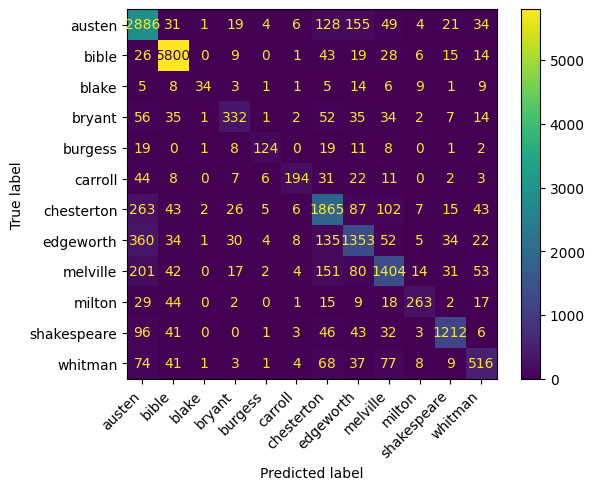

In [ ]:
v = vectorizer(best[1])
X_train = v.fit_transform(train_full)
X_test = v.transform(test_full)
model = svm.LinearSVC(C=best[2])
X_train_normalized = normalize(X_train, norm='l2')
X_test_normalized = normalize(X_test, norm='l2')
model.fit(X_train_normalized, train_labels)
tpreds_normalized = model.predict(X_test_normalized)
acc=accuracy_score(test_labels, tpreds_normalized)
print(f'Acuratetea folosind parametrii {best[1], best[2]} pe datele de test: {acc}')
print(classification_report(test_labels, tpreds_normalized, target_names = authors))
cn = confusion_matrix(test_labels, tpreds_normalized, labels=model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cn, display_labels=authors)
disp.plot()
plt.xticks(rotation=45, ha="right")
plt.show()

Avand modelul cel mai bun, vom creea o functie care sa permita interogarea modelului

In [ ]:
def predict(model, propozitie = None):
  # if(not propozitie):
  #   return ("error")
  propozitie = [propozitie]
  propozitie = v.transform(propozitie)
  propozitie = normalize(propozitie, norm = 'l2')
  rez = model.predict(propozitie)
  return authors[rez[0]]
# propozitie = input("Introduceti propozitie >>> ")
# print("Propozitia probabil a fost scrisa de :",predict(propozitie))

Mai departe vom construi un algoritm care imparte un intreg paragraf in mai multe propozitii si vom returna autorul cel mai probabil sa fi scris acel paragraf

In [ ]:
def transformParagraf(paragraf = None):
  # # urmatoarele 2 linii sunt in caz ca exista poezii ca alea nu delimiteaza mereu finalul de propozitie si trb adaugate manual
  paragraf = paragraf.replace('\\n', '. ') # daca e dat ca input
  paragraf = paragraf.replace('\n', '. ') # daca e dat ca variabila
  propozitii = nltk.sent_tokenize(paragraf)
  prop = []
  for i in propozitii:
    prop.append(preprocess_nltk(i, stopwords_list))
  return words_to_sentences(prop)

def predictParagraf(model, paragraf = None):
  if(not paragraf[0]):
    return('error')
  predictii = []
  for p in transformParagraf(paragraf):
    p = p
    predictii.append(predict(model, p))
  counter = Counter(predictii)
  return counter.most_common(1)[0][0]

Acum avem doua functii cu care putem sa testam modelul pe propozitie/paragraf, acesta returnand numele autorului.

In [ ]:
propozitie = "Was it doubted that those who corrupt their own bodies conceal themselves?"
#propozitie luata din "I SING THE BODY ELECTRIC" - Walt Whitman

paragraf = "Mrs. Allen was so long in dressing that they did not enter the ballroom till late. The season was full, the room crowded, and the two ladies squeezed in as well as they could. As for Mr. Allen, he repaired directly to the card-room, and left them to enjoy a mob by themselves. With more care for the safety of her new gown than for the comfort of her protegee, Mrs. Allen made her way through the throng of men by the door, as swiftly as the necessary caution would allow; Catherine, however, kept close at her side, and linked her arm too firmly within her friend's to be torn asunder by any common effort of a struggling assembly. But to her utter amazement she found that to proceed along the room was by no means the way to disengage themselves from the crowd; it seemed rather to increase as they went on, whereas she had imagined that when once fairly within the door, they should easily find seats and be able to watch the dances with perfect convenience. But this was far from being the case, and though by unwearied diligence they gained even the top of the room, their situation was just the same; they saw nothing of the dancers but the high feathers of some of the ladies. Still they moved on—something better was yet in view; and by a continued exertion of strength and ingenuity they found themselves at last in the passage behind the highest bench. Here there was something less of crowd than below; and hence Miss Morland had a comprehensive view of all the company beneath her, and of all the dangers of her late passage through them. It was a splendid sight, and she began, for the first time that evening, to feel herself at a ball: she longed to dance, but she had not an acquaintance in the room. Mrs. Allen did all that she could do in such a case by saying very placidly, every now and then, 'I wish you could dance, my dear—I wish you could get a partner.' For some time her young friend felt obliged to her for these wishes; but they were repeated so often, and proved so totally ineffectual, that Catherine grew tired at last, and would thank her no more."
#paragraf luat din "NORTHANGER ABBEY -- Jane Austen
print(predict(model, propozitie).capitalize())
print(predictParagraf(model, paragraf).capitalize())

Whitman
Austen


> # **Modelul Naive Bayes**

In [ ]:
modelNB = MultinomialNB()

v = vectorizer(5000)
X_train = v.fit_transform(train_full)
X_test = v.transform(test_full)
X_train_normalized = normalize(X_train, norm='l2')
X_test_normalized = normalize(X_test, norm='l2')
modelNB.fit(X_train_normalized, train_labels)
tpreds_normalized = modelNB.predict(X_test_normalized)
accuracy_normalized = accuracy_score(test_labels, tpreds_normalized)
print(accuracy_score(test_labels, tpreds_normalized))


0.7230339928970066


Optimizarea hiperparametrilor

In [ ]:
def train_and_test_NB(nr_caracteristici, a):
  v = vectorizer(nr_caracteristici)
  X_train = v.fit_transform(train_full)
  X_valid = v.transform(valid_full)
  modelNB = MultinomialNB(alpha=a)
  X_train_normalized_NB = normalize(X_train, norm='l2')
  X_valid_normalized_NB = normalize(X_valid, norm='l2')
  modelNB.fit(X_train_normalized_NB, train_labels)
  vpreds_normalized_NB = modelNB.predict(X_valid_normalized_NB)
  return(accuracy_score(valid_labels, vpreds_normalized_NB))

bestNB = (0, ...)
nrCaracteristici = [5000, 10000, 25000, 50000]
alpha = [1, 0.1, 0.001, 0.0001, 0.00001, 0.000001]
parametrii = [el for el in itertools.product(nrCaracteristici, alpha)]
for p in parametrii:
  acc = train_and_test_NB(p[0], p[1])
  if(acc>bestNB[0]):
    bestNB=(acc, p[0], p[1])
  print(f'Parametrii: {p[0]}, {p[1]} - Acuratetea: {acc}')
print(bestNB)

Parametrii: 5000, 1 - Acuratetea: 0.7259428378149839
Parametrii: 5000, 0.1 - Acuratetea: 0.7579063081346187
Parametrii: 5000, 0.001 - Acuratetea: 0.756637916455268
Parametrii: 5000, 0.0001 - Acuratetea: 0.7552849653306274
Parametrii: 5000, 1e-05 - Acuratetea: 0.7534246575342466
Parametrii: 5000, 1e-06 - Acuratetea: 0.7519871469643159
Parametrii: 10000, 1 - Acuratetea: 0.7288178589548453
Parametrii: 10000, 0.1 - Acuratetea: 0.7873329950955522
Parametrii: 10000, 0.001 - Acuratetea: 0.7866565195332319
Parametrii: 10000, 0.0001 - Acuratetea: 0.7842042956198207
Parametrii: 10000, 1e-05 - Acuratetea: 0.7809064772535093
Parametrii: 10000, 1e-06 - Acuratetea: 0.778285134449518
Parametrii: 25000, 1 - Acuratetea: 0.7003213258921022
Parametrii: 25000, 0.1 - Acuratetea: 0.797902925756807
Parametrii: 25000, 0.001 - Acuratetea: 0.8072044647387113
Parametrii: 25000, 0.0001 - Acuratetea: 0.8040757652629799
Parametrii: 25000, 1e-05 - Acuratetea: 0.8011161846778285
Parametrii: 25000, 1e-06 - Acuratetea:

Acuratetea folosind parametrii (50000, 0.001) pe datele de test: 0.8119228817858954
              precision    recall  f1-score   support

      austen       0.75      0.87      0.80      3338
       bible       0.85      0.99      0.92      5961
       blake       0.92      0.24      0.38        96
      bryant       0.86      0.51      0.64       571
     burgess       0.95      0.63      0.75       193
     carroll       0.88      0.52      0.66       328
  chesterton       0.77      0.74      0.76      2464
   edgeworth       0.76      0.65      0.70      2038
    melville       0.77      0.73      0.75      1999
      milton       0.85      0.70      0.77       400
 shakespeare       0.96      0.80      0.87      1483
     whitman       0.81      0.60      0.69       839

    accuracy                           0.81     19710
   macro avg       0.84      0.67      0.72     19710
weighted avg       0.81      0.81      0.81     19710



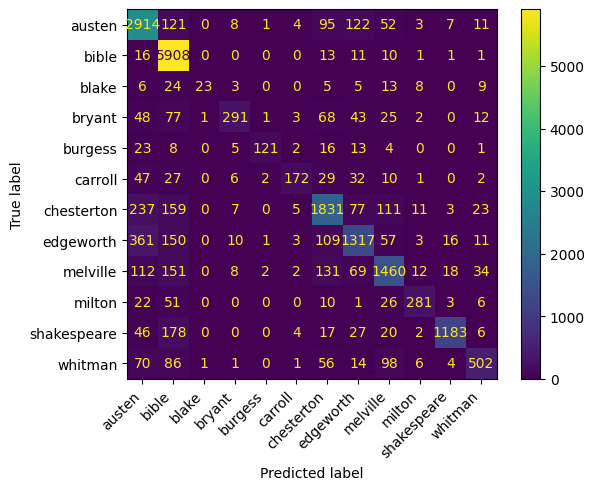

In [ ]:
# rulez datele de test pe cel mai bun model
v = vectorizer(bestNB[1])
X_train = v.fit_transform(train_full)
X_test = v.transform(test_full)
modelNB = MultinomialNB(alpha=bestNB[2])
X_train_normalized_NB = normalize(X_train, norm='l2')
X_test_normalized_NB = normalize(X_test, norm='l2')
modelNB.fit(X_train_normalized_NB, train_labels)
tpreds_normalized_NB = modelNB.predict(X_test_normalized_NB)
acc=accuracy_score(test_labels, tpreds_normalized_NB)
print(f'Acuratetea folosind parametrii {bestNB[1], bestNB[2]} pe datele de test: {acc}')
print(classification_report(test_labels, tpreds_normalized_NB, target_names = authors))
cnNB = confusion_matrix(test_labels, tpreds_normalized_NB, labels=modelNB.classes_)
dispNB = ConfusionMatrixDisplay(confusion_matrix=cnNB, display_labels=authors)
dispNB.plot()
plt.xticks(rotation=45, ha="right")
plt.show()

Functiile predict si predictParagraf raman la fel

In [ ]:
propozitie = "Was it doubted that those who corrupt their own bodies conceal themselves?"
#propozitie luata din "I SING THE BODY ELECTRIC" - Walt Whitman

paragraf = "Mrs. Allen was so long in dressing that they did not enter the ballroom till late. The season was full, the room crowded, and the two ladies squeezed in as well as they could. As for Mr. Allen, he repaired directly to the card-room, and left them to enjoy a mob by themselves. With more care for the safety of her new gown than for the comfort of her protegee, Mrs. Allen made her way through the throng of men by the door, as swiftly as the necessary caution would allow; Catherine, however, kept close at her side, and linked her arm too firmly within her friend's to be torn asunder by any common effort of a struggling assembly. But to her utter amazement she found that to proceed along the room was by no means the way to disengage themselves from the crowd; it seemed rather to increase as they went on, whereas she had imagined that when once fairly within the door, they should easily find seats and be able to watch the dances with perfect convenience. But this was far from being the case, and though by unwearied diligence they gained even the top of the room, their situation was just the same; they saw nothing of the dancers but the high feathers of some of the ladies. Still they moved on—something better was yet in view; and by a continued exertion of strength and ingenuity they found themselves at last in the passage behind the highest bench. Here there was something less of crowd than below; and hence Miss Morland had a comprehensive view of all the company beneath her, and of all the dangers of her late passage through them. It was a splendid sight, and she began, for the first time that evening, to feel herself at a ball: she longed to dance, but she had not an acquaintance in the room. Mrs. Allen did all that she could do in such a case by saying very placidly, every now and then, 'I wish you could dance, my dear—I wish you could get a partner.' For some time her young friend felt obliged to her for these wishes; but they were repeated so often, and proved so totally ineffectual, that Catherine grew tired at last, and would thank her no more."
#paragraf luat din "NORTHANGER ABBEY -- Jane Austen
print(predict(modelNB, propozitie).capitalize())
print(predictParagraf(modelNB, paragraf).capitalize())

Whitman
Austen


In [ ]:
p = input("Introduceti propozitie sau paragraf >>> ")
if len(transformParagraf(p)) == 1:
  print("Propozitia probabil a fost scrisa de:",predict(modelNB, p).capitalize())
else:
  print("Paragraful probabil a fost scris de:",predictParagraf(modelNB, p).capitalize())